In [149]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import random
import matplotlib.pyplot as plt

In [160]:
apple = pd.read_csv("AAPL_Options.csv")
s = 151.03
r = 0.0425
coupon = 0.0053
b = r - coupon
days = 49
t = days / 365
put = 0
call = 0

In [161]:
def find_ivol(price, option_type):
    epsilon = 0.001
    max_iterations = 100
    sig = 0.5
    for i in range(max_iterations):
        if option_type == "Call":
            d1 = (np.log(s/x) + (b + sig**2/2)*t) / (sig * np.sqrt(t))
            d2 = d1 - sig * np.sqrt(t)
            call_price = s * np.e**((b - r) * t) * norm.cdf(d1) - x * np.e**(-r * t) * norm.cdf(d2)
            vega = s * np.sqrt(t) * norm.pdf(d1)
            diff = price - call_price
        else:
            d1 = (np.log(s/x) + (b + sig**2/2)*t) / (sig * np.sqrt(t))
            d2 = d1 - sig * np.sqrt(t)
            put_price = x * np.e**(-r * t) * norm.cdf(-d2) - s * np.e**((b - r) * t) * norm.cdf(-d1)
            vega = s * np.sqrt(t) * norm.pdf(d1)
            diff = price - put_price
        if abs(diff) < epsilon:
            break
        sig = sig + diff/vega
    return sig

In [169]:
callvals = []
putvals = []
strikescall = []
strikesput = []
for i in range(len(apple.index)):
    line = np.array(apple.loc[i])
    x = line[3]
    if line[2] == "Call":
        strikescall.append(x)
        call = line[4]
        ivol = find_ivol(call, "Call")
        callvals.append(ivol)
    else:
        strikesput.append(x)
        put = line[4]
        ivol = find_ivol(put, "Put")
        putvals.append(ivol)

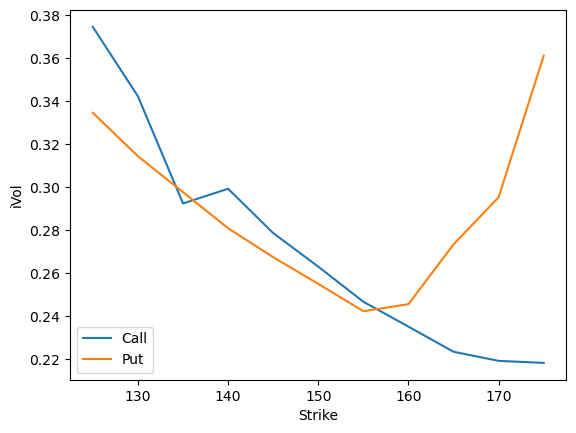

In [170]:
plt.plot(strikescall, callvals, label="Call")
plt.plot(strikesput, putvals, label="Put")
plt.xlabel('Strike')
plt.ylabel('iVol')
plt.legend()
plt.show()